In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('lemonade.csv')

In [3]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         365 non-null    object 
 1   Day          365 non-null    object 
 2   Temperature  365 non-null    float64
 3   Rainfall     365 non-null    float64
 4   Flyers       365 non-null    int64  
 5   Price        365 non-null    float64
 6   Sales        365 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB


Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?

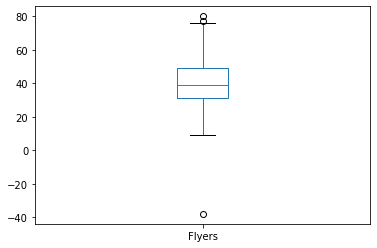

In [5]:
df.Flyers.plot.box()

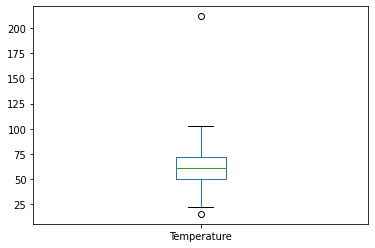

In [6]:
df.Temperature.plot.box()

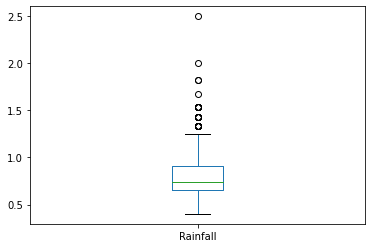

In [7]:
df.Rainfall.plot.box()

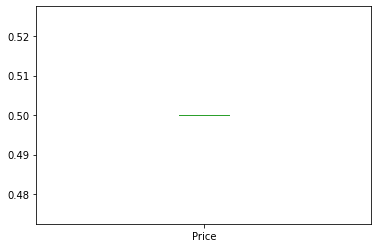

In [8]:
df.Price.plot.box()

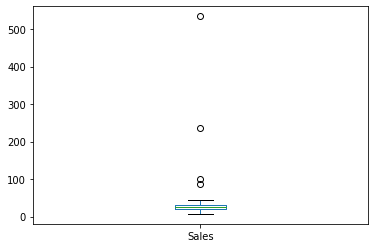

In [9]:
df.Sales.plot.box()

In [10]:
def get_upper_outliers(s, k):
    '''
    Given a series and a cutoff value, k, returns the upper outliers for the
    series.

    The values returned will be either 0 (if the point is not an outlier), or a
    number that indicates how far away from the upper bound the observation is.
    '''
    q1, q3 = s.quantile([.25, .75])
    iqr = q3 - q1
    upper_bound = q3 + k * iqr
    return s.apply(lambda x: max([x - upper_bound, 0]))

def get_lower_outliers(s, k):
    '''
    Given a series and a cutoff value, k, returns the lower outliers for the series.
    
    The values returned will be either 0 )if the point is not an outlier), or a number
    that indicates how far away form the lower bound the observation is.
    '''

    q1, q3 = s.quantile([.25, .75])
    iqr = q3 - q1
    lower_bound = q1 - k * iqr
    return s.apply(lambda x: min([x - lower_bound, 0])) 
    
def add_upper_lower_outlier_columns(df, k):
    '''
    Add a column with the suffix _outliers for all the numeric columns
    in the given dataframe.
    '''
    # outlier_cols = {col + '_outliers': get_upper_outliers(df[col], k)
    #                 for col in df.select_dtypes('number')}
    # return df.assign(**outlier_cols)

    for col in df.select_dtypes('number'):
        df[col + '_upper_outliers'] = get_upper_outliers(df[col], k)
        df[col + '_lower_outliers'] = get_lower_outliers(df[col], k)

    return df

In [11]:
df_1 = add_upper_lower_outlier_columns(df, 1.5)

In [14]:
df[df.Flyers_lower_outliers < 0.00]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_upper_outliers,Temperature_lower_outliers,Rainfall_upper_outliers,Rainfall_lower_outliers,Flyers_upper_outliers,Flyers_lower_outliers,Price_upper_outliers,Price_lower_outliers,Sales_upper_outliers,Sales_lower_outliers
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20,0.0,0.0,0.0,0,0.0,-42.0,0.0,0.0,0.0,0


In [12]:
df.iloc[0:-1, 7:-1].sum()

Temperature_upper_outliers    107.30
Temperature_lower_outliers      0.00
Rainfall_upper_outliers         4.97
Rainfall_lower_outliers         0.00
Flyers_upper_outliers           5.00
Flyers_lower_outliers         -42.00
Price_upper_outliers            0.00
Price_lower_outliers            0.00
Sales_upper_outliers          775.00
dtype: float64

In [ ]:
df.Flyers.argmin()

In [13]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_upper_outliers,Temperature_lower_outliers,Rainfall_upper_outliers,Rainfall_lower_outliers,Flyers_upper_outliers,Flyers_lower_outliers,Price_upper_outliers,Price_lower_outliers,Sales_upper_outliers,Sales_lower_outliers
0,1/1/17,Sunday,27.0,2.00,15,0.5,10,0.0,0.0,0.70,0,0.0,0.0,0.0,0.0,0.0,0
1,1/2/17,Monday,28.9,1.33,15,0.5,13,0.0,0.0,0.03,0,0.0,0.0,0.0,0.0,0.0,0
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15,0.0,0.0,0.03,0,0.0,0.0,0.0,0.0,0.0,0
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17,0.0,0.0,0.00,0,0.0,0.0,0.0,0.0,0.0,0
4,1/5/17,Thursday,42.4,1.00,33,0.5,18,0.0,0.0,0.00,0,0.0,0.0,0.0,0.0,0.0,0
